## About this file and all files relate to my undergraduate senior research project

This is "SVM.ipynb", which is the code of SVM I used in the undergraduate senior reseach project, "Galaxy Morphology Classification via Machine Learning."

Summary of the files relate to the senior research project, "Galaxy Morphology Classification via Machine Learning"
# 1. Data
・Galaxy Zoo --> "gz.csv"\
・SDSS DR7 --> "result.csv", "result (1).csv", "result (2).csv", "result (3).csv", "result (4).csv", "result (5).csv"
# 2. Code
・Data Preparation --> "Data Preparation.ipynb"\
・K-means clustering --> "K-means Clustering .ipynb"\
・SVM --> SVM.ipynb
# 3. Presentation
・Progress report used at colloquium on October 16th, 2019 --> "colloquium.key"
# 4. Paper
・Paper submitted on December 4th, 2019 --> "final paper.pdf"

If you have any questions, please contact me (kanta29.1996@gmail.com).

# 2. Supervised Machine Learning (Support Vector Machine)

# SVM  with scikit_learn: : G-R VS Concentration of R

In [6]:
import pandas as pd
import numpy as np
from IPython.display import Image
%matplotlib inline

# Read "data_sl.csv" and assign it as "data2"
data2 = pd.read_csv("data_sl.csv")

# Put the values of "g-r" and "concentration_r" in X_1
X_1 = data2[["g-r","concentration_r"]]

#Converting class types into integers 0 for E and 1 for S
data2["class"] = [0 if i == "E" else 1 for i in data2["class"]]
y_1 = data2["class"]

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data into traing (70%) and test data (30%)
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, y_1, test_size=0.3, random_state=None)

from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC

# Execute Linear SVM by using Scilit-learn
svm_clf_1 = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge",  max_iter=100000)),
])

#Train model with fit function
svm_clf_1.fit(X_1_train, y_1_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=1, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=100000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [11]:
#Confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
y_1_pred_linear = svm_clf_1.predict(X_1_test)

print(confusion_matrix(y_1_test, y_1_pred_linear))
print(classification_report(y_1_test, y_1_pred_linear))

[[1211  374]
 [ 371 4303]]
              precision    recall  f1-score   support

           0       0.77      0.76      0.76      1585
           1       0.92      0.92      0.92      4674

    accuracy                           0.88      6259
   macro avg       0.84      0.84      0.84      6259
weighted avg       0.88      0.88      0.88      6259



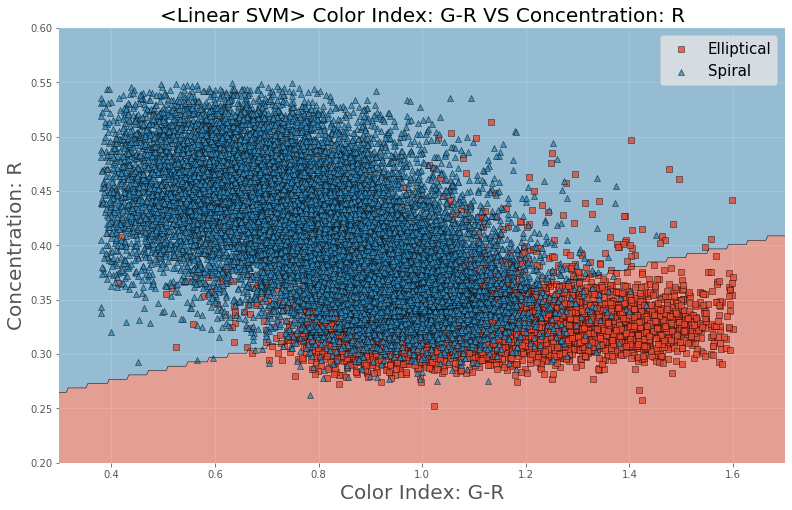

In [12]:
#Visualize the result
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
plt.style.use('ggplot') 

X_1_combined = np.vstack((X_1_train, X_1_test))
y_1_combined = np.hstack((y_1_train, y_1_test))

fig = plt.figure(figsize=(13,8))
plot_decision_regions(X_1_combined, y_1_combined, clf=svm_clf_1, colors='C0,C1,C2',  res=0.02)
plt.title("<Linear SVM> Color Index: G-R VS Concentration: R", fontsize=20)
plt.xlabel("Color Index: G-R", fontsize=20)
plt.ylabel("Concentration: R", fontsize=20)
plt.xlim(0.3,  1.7)
plt.ylim(0.2,  0.6)
L = plt.legend(fontsize=15)
L.get_texts()[0].set_text('Elliptical')
L.get_texts()[1].set_text('Spiral')
plt.savefig('images/Linear SVM G-R VS Concentration_R.png', dpi=300)
plt.show()

# Kernel SVM

# 1. Polynomial Kernel

In [13]:
from sklearn.svm import SVC

# Execute Polynomial Kernel by using Scilit-learn
poly_kernel_svm_clf_1 = Pipeline([
    ("scaler",  StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
])
#Train model with fit function
poly_kernel_svm_clf_1.fit(X_1_train, y_1_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=5, cache_size=200, class_weight=None, coef0=1,
                     decision_function_shape='ovr', degree=3,
                     gamma='auto_deprecated', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [14]:
y_1_pred_poly = poly_kernel_svm_clf_1.predict(X_1_test)

In [15]:
# Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_1_test, y_1_pred_poly))
print(classification_report(y_1_test, y_1_pred_poly))

[[1106  479]
 [ 234 4440]]
              precision    recall  f1-score   support

           0       0.83      0.70      0.76      1585
           1       0.90      0.95      0.93      4674

    accuracy                           0.89      6259
   macro avg       0.86      0.82      0.84      6259
weighted avg       0.88      0.89      0.88      6259



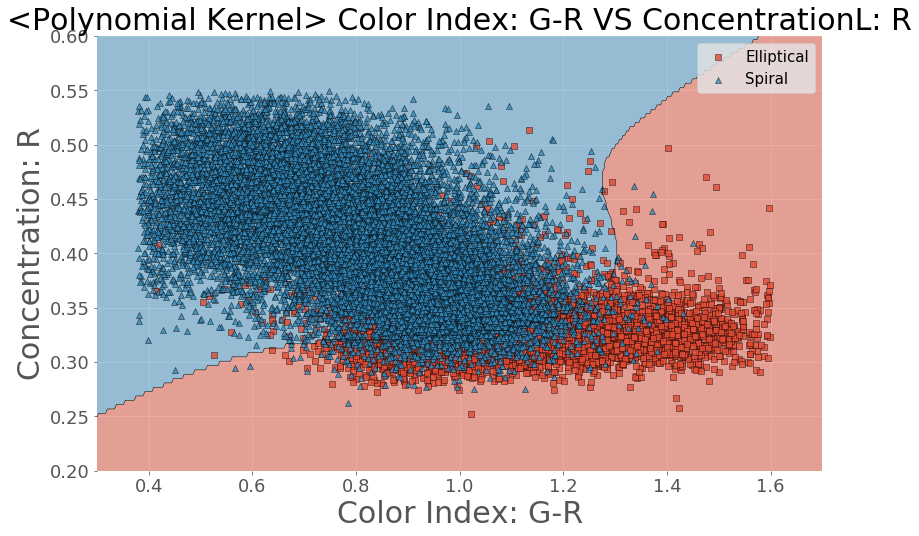

In [21]:
#Visualize the result
import matplotlib
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
plt.style.use('ggplot') 

fig = plt.figure(figsize=(13,8))
plot_decision_regions(X_1_combined, y_1_combined, clf=poly_kernel_svm_clf_1, colors='C0,C1,C2',  res=0.02)
plt.title("<Polynomial Kernel> Color Index: G-R VS ConcentrationL: R", fontsize=30)
plt.xlabel("Color Index: G-R", fontsize=30)
plt.ylabel("Concentration: R", fontsize=30)
plt.xlim(0.3,  1.7)
plt.ylim(0.2,  0.6)
plt.tick_params(labelsize=18)
L = plt.legend(fontsize=15)
L.get_texts()[0].set_text('Elliptical')
L.get_texts()[1].set_text('Spiral')
plt.savefig('images/Polynomial Kernel G-R VS Concentration_R.png', dpi=300)
plt.show()

# 2.Gaussian Kernel (RBF kernel)

In [25]:
# Execute the Gaussian Kernel by using Scikit-learn
rbf_kernel_svm_1 = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=0.2, C=1))
])
# Train the model with fit function
rbf_kernel_svm_1.fit(X_1_train, y_1_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=0.2,
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [26]:
y_1_pred_gaussian = rbf_kernel_svm_1.predict(X_1_test)

In [27]:
# Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_1_test, y_1_pred_gaussian))
print(classification_report(y_1_test, y_1_pred_gaussian))

[[1172  421]
 [ 269 4397]]
              precision    recall  f1-score   support

           0       0.81      0.74      0.77      1593
           1       0.91      0.94      0.93      4666

    accuracy                           0.89      6259
   macro avg       0.86      0.84      0.85      6259
weighted avg       0.89      0.89      0.89      6259



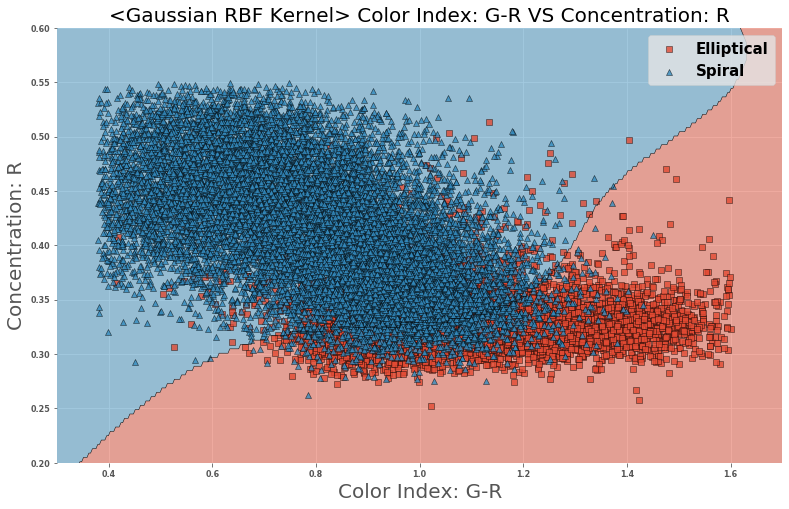

In [28]:
#Visualize the result
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
plt.style.use('ggplot') 

fig = plt.figure(figsize=(13,8))
plot_decision_regions(X_1_combined, y_1_combined, clf=rbf_kernel_svm_1,  colors='C0,C1,C2', res=0.02)
plt.title("<Gaussian RBF Kernel> Color Index: G-R VS Concentration: R", fontsize=20)
plt.xlabel("Color Index: G-R", fontsize=20)
plt.ylabel("Concentration: R", fontsize=20)
plt.xlim(0.3,  1.7)
plt.ylim(0.2,  0.6)
L = plt.legend(fontsize=15)
L.get_texts()[0].set_text('Elliptical')
L.get_texts()[1].set_text('Spiral')
plt.savefig('images/Gaussian Kernel G-R VS Concentration_R.png', dpi=300)
plt.show()

# 3. Sigmoid Kernel

In [29]:
# Execute the sigmoid kernel by using Scikit-learn
from sklearn.svm import SVC
sigmoid_kernel_svm_clf_1 = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel='sigmoid', C=1))
])
# Train the model with fit function
sigmoid_kernel_svm_clf_1.fit(X_1_train, y_1_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3,
                     gamma='auto_deprecated', kernel='sigmoid', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [30]:
y_1_pred_sigmoid= sigmoid_kernel_svm_clf_1.predict(X_1_test)

In [31]:
# Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_1_test, y_1_pred_sigmoid))
print(classification_report(y_1_test, y_1_pred_sigmoid))

[[ 658  935]
 [ 859 3807]]
              precision    recall  f1-score   support

           0       0.43      0.41      0.42      1593
           1       0.80      0.82      0.81      4666

    accuracy                           0.71      6259
   macro avg       0.62      0.61      0.62      6259
weighted avg       0.71      0.71      0.71      6259



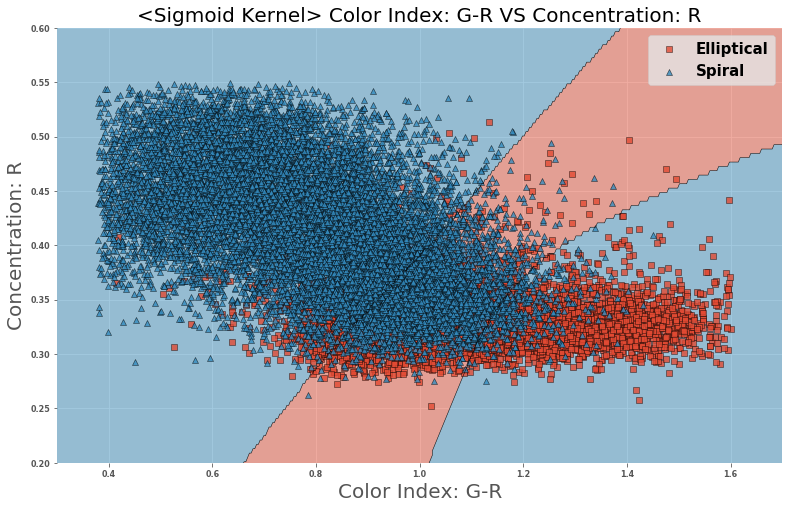

In [32]:
#Visualize the result
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
plt.style.use('ggplot') 

fig = plt.figure(figsize=(13,8))
plot_decision_regions(X_1_combined, y_1_combined, clf=sigmoid_kernel_svm_clf_1,  colors='C0,C1,C2', res=0.02)
plt.title("<Sigmoid Kernel> Color Index: G-R VS Concentration: R", fontsize=20)
plt.xlabel("Color Index: G-R", fontsize=20)
plt.ylabel("Concentration: R", fontsize=20)
plt.xlim(0.3,  1.7)
plt.ylim(0.2,  0.6)
L = plt.legend(fontsize=15)
L.get_texts()[0].set_text('Elliptical')
L.get_texts()[1].set_text('Spiral')
plt.savefig('<Sigmoid Kernel> Color Index: G-R VS Concentration: R.png', dpi=300)
plt.show()

I will not add explanations for the following combinations of parameters since the all procedures are same. 

# SVM with Scikitlearn"concentration_g" VS "concentration_r"

# 1. Linear SVM

In [33]:
import pandas as pd
import numpy as np
from IPython.display import Image
%matplotlib inline

data2 = pd.read_csv("data_sl.csv")
X_2 = data2[["concentration_g","concentration_r"]]

#Converting class types into integers 0 for E and 1 for S
data2["class"] = [0 if i == "E" else 1 for i in data2["class"]]
y_2 = data2["class"]

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Separate data into traing (70%) and test data (30%)
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, y_2, test_size=0.3, random_state=None)

from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC

#Linear SVM
svm_clf_2 = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge", max_iter=10000)),
])

#Train model with fit function
svm_clf_2.fit(X_2_train, y_2_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=1, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=10000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [34]:
from sklearn.metrics import classification_report, confusion_matrix
y_2_pred_linear = svm_clf_2.predict(X_2_test)
print(confusion_matrix(y_2_test, y_2_pred_linear))
print(classification_report(y_2_test, y_2_pred_linear))

[[1174  390]
 [ 415 4280]]
              precision    recall  f1-score   support

           0       0.74      0.75      0.74      1564
           1       0.92      0.91      0.91      4695

    accuracy                           0.87      6259
   macro avg       0.83      0.83      0.83      6259
weighted avg       0.87      0.87      0.87      6259



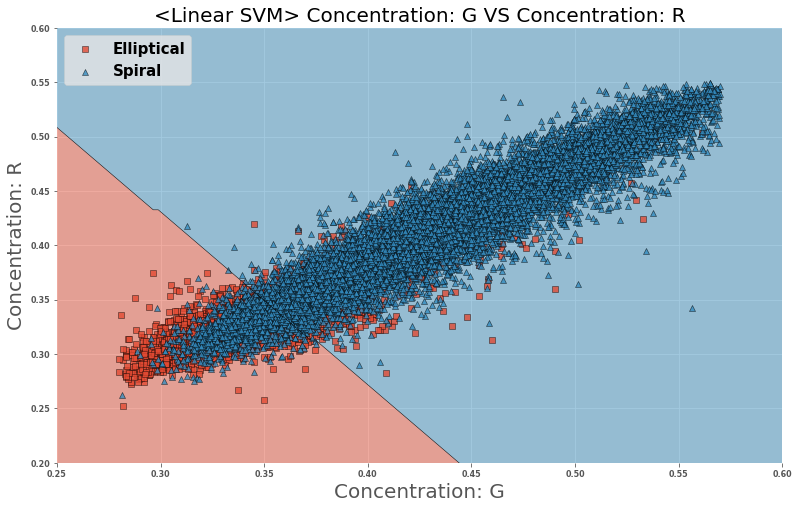

In [35]:
#Visualization
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
plt.style.use('ggplot') 

X_2_combined = np.vstack((X_2_train, X_2_test))
y_2_combined = np.hstack((y_2_train, y_2_test))

fig = plt.figure(figsize=(13,8))
plot_decision_regions(X_2_combined, y_2_combined, clf=svm_clf_2, colors='C0,C1,C2',  res=0.02)
plt.title("<Linear SVM> Concentration: G VS Concentration: R", fontsize=20)
plt.xlabel("Concentration: G", fontsize=20)
plt.ylabel("Concentration: R", fontsize=20)
plt.xlim(0.25, 0.60)
plt.ylim(0.2,  0.6)
L = plt.legend(fontsize=15)
L.get_texts()[0].set_text('Elliptical')
L.get_texts()[1].set_text('Spiral')
plt.savefig('images/Linear SVM Concentration_G VS Concentration_R.png', dpi=300)
plt.show()

# 1. Polynomial Kernel

In [36]:
from sklearn.svm import SVC
poly_kernel_svm_clf_2 = Pipeline([
    ("scaler",  StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=1, coef0=1, C=1))
])
poly_kernel_svm_clf_2.fit(X_2_train, y_2_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=1, cache_size=200, class_weight=None, coef0=1,
                     decision_function_shape='ovr', degree=1,
                     gamma='auto_deprecated', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [37]:
from sklearn.metrics import classification_report, confusion_matrix
y_2_pred_poly= poly_kernel_svm_clf_2.predict(X_2_test)
print(confusion_matrix(y_2_test, y_2_pred_poly))
print(classification_report(y_2_test, y_2_pred_poly))

[[1173  391]
 [ 415 4280]]
              precision    recall  f1-score   support

           0       0.74      0.75      0.74      1564
           1       0.92      0.91      0.91      4695

    accuracy                           0.87      6259
   macro avg       0.83      0.83      0.83      6259
weighted avg       0.87      0.87      0.87      6259



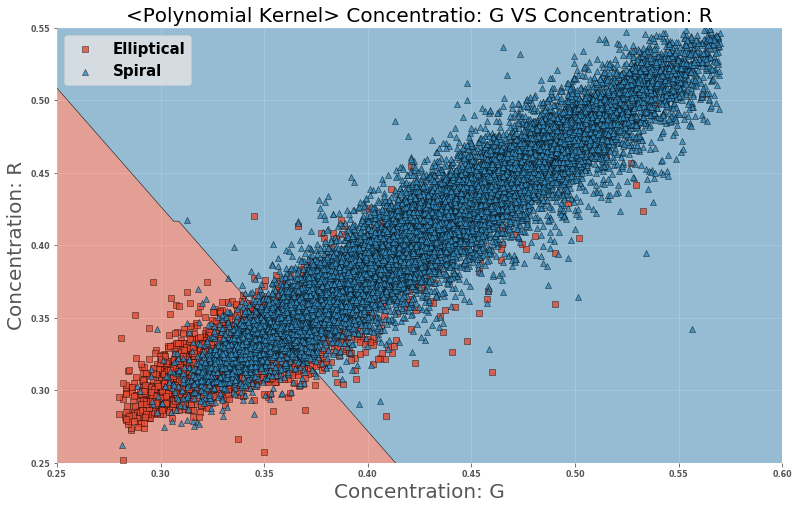

In [38]:
#Visualization
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
plt.style.use('ggplot') 

fig = plt.figure(figsize=(13,8))
plot_decision_regions(X_2_combined, y_2_combined, clf=poly_kernel_svm_clf_2, colors='C0,C1,C2',  res=0.02)
plt.title("<Polynomial Kernel> Concentratio: G VS Concentration: R", fontsize=20)
plt.xlabel("Concentration: G", fontsize=20)
plt.ylabel("Concentration: R", fontsize=20)
plt.xlim(0.25,  0.6)
plt.ylim(0.25,  0.55)
L = plt.legend(fontsize=15)
L.get_texts()[0].set_text('Elliptical')
L.get_texts()[1].set_text('Spiral')
plt.savefig('images/Polynomial Kernel Concentration_G VS Concentration_R.png', dpi=300)
plt.show()

# 2. Gaussian Kernel

In [39]:
rbf_kernel_svm_2 = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=0.2, C=1))
])
rbf_kernel_svm_2.fit(X_2_train, y_2_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=0.2,
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [40]:
from sklearn.metrics import classification_report, confusion_matrix
y_2_pred_gaussian = rbf_kernel_svm_2.predict(X_2_test)
print(confusion_matrix(y_2_test, y_2_pred_gaussian))
print(classification_report(y_2_test, y_2_pred_gaussian))

[[1105  459]
 [ 356 4339]]
              precision    recall  f1-score   support

           0       0.76      0.71      0.73      1564
           1       0.90      0.92      0.91      4695

    accuracy                           0.87      6259
   macro avg       0.83      0.82      0.82      6259
weighted avg       0.87      0.87      0.87      6259



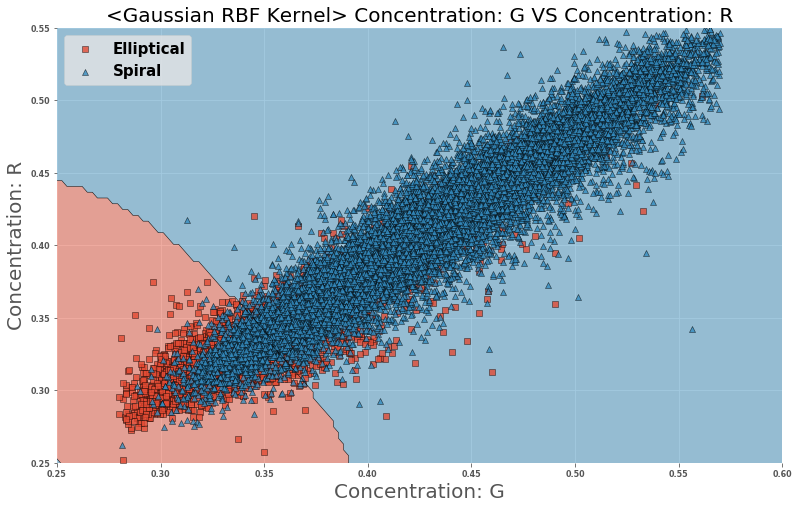

In [41]:
#Visualization
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
plt.style.use('ggplot') 

fig = plt.figure(figsize=(13,8))
plot_decision_regions(X_2_combined, y_2_combined, clf=rbf_kernel_svm_2,  colors='C0,C1,C2', res=0.02)
plt.title("<Gaussian RBF Kernel> Concentration: G VS Concentration: R", fontsize=20)
plt.xlabel("Concentration: G", fontsize=20)
plt.ylabel("Concentration: R", fontsize=20)
plt.xlim(0.25,  0.6)
plt.ylim(0.25,  0.55)
L = plt.legend(fontsize=15)
L.get_texts()[0].set_text('Elliptical')
L.get_texts()[1].set_text('Spiral')
plt.savefig('images/Gaussian Kernel Concentration_G VS Concentration_R.png', dpi=300)
plt.show()

# 3. Sigmoid Kernel

In [42]:
from sklearn.svm import SVC
sigmoid_kernel_svm_clf_2 = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel='sigmoid', C=1))
])
sigmoid_kernel_svm_clf_2.fit(X_2_train, y_2_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3,
                     gamma='auto_deprecated', kernel='sigmoid', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [43]:
y_2_pred_sigmoid= sigmoid_kernel_svm_clf_2.predict(X_2_test)

In [44]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_2_test, y_2_pred_sigmoid))
print(classification_report(y_2_test, y_2_pred_sigmoid))

[[ 622  942]
 [ 949 3746]]
              precision    recall  f1-score   support

           0       0.40      0.40      0.40      1564
           1       0.80      0.80      0.80      4695

    accuracy                           0.70      6259
   macro avg       0.60      0.60      0.60      6259
weighted avg       0.70      0.70      0.70      6259



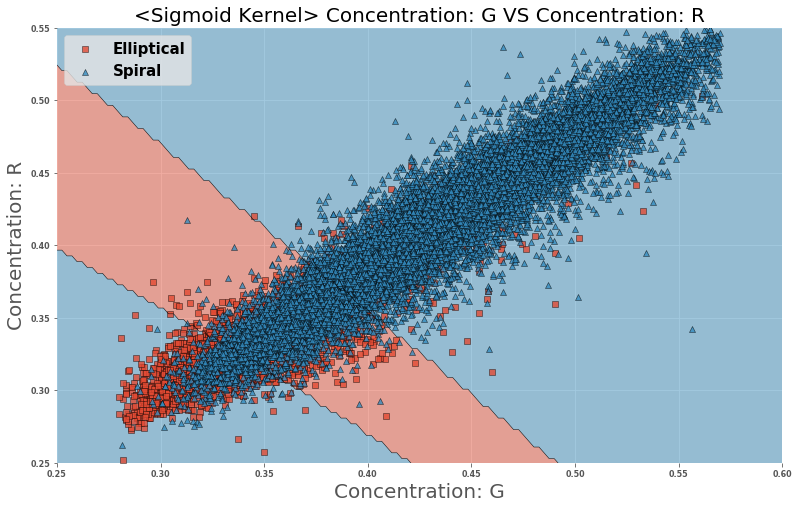

In [46]:
#Visualization
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
plt.style.use('ggplot') 

fig = plt.figure(figsize=(13,8))
plot_decision_regions(X_2_combined, y_2_combined, clf=sigmoid_kernel_svm_clf_2,  colors='C0,C1,C2', res=0.02)
plt.title("<Sigmoid Kernel> Concentration: G VS Concentration: R", fontsize=20)
plt.xlabel("Concentration: G", fontsize=20)
plt.ylabel("Concentration: R", fontsize=20)
plt.xlim(0.25,  0.6)
plt.ylim(0.25,  0.55)
L = plt.legend(fontsize=15)
L.get_texts()[0].set_text('Elliptical')
L.get_texts()[1].set_text('Spiral')
plt.savefig('images/Sigmoid Kernel Concentration_G VS Concentration_R.png', dpi=300)
plt.show()

# modelMag_g VS modelMag_r

# Linear SVM

In [47]:
import pandas as pd
import numpy as np
from IPython.display import Image
%matplotlib inline
data2 = pd.read_csv("data_sl.csv")
X_3 = data2[["modelMag_g","modelMag_r"]]

#Converting class types into integers 0 for E and 1 for S
data2["class"] = [0 if i == "E" else 1 for i in data2["class"]]
y_3 = data2["class"]

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Separate data into traing (70%) and test data (30%)
X_3_train, X_3_test, y_3_train, y_3_test = train_test_split(X_3, y_3, test_size=0.3, random_state=None)

from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC

#Linear SVM
svm_clf_3 = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge",  max_iter=100000)),
])

#Train model with fit function
svm_clf_3.fit(X_3_train, y_3_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=1, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=100000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [48]:
y_3_pred_linear= svm_clf_3.predict(X_3_test)

In [49]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_3_test, y_3_pred_linear))
print(classification_report(y_3_test, y_3_pred_linear))

[[1030  487]
 [ 324 4418]]
              precision    recall  f1-score   support

           0       0.76      0.68      0.72      1517
           1       0.90      0.93      0.92      4742

    accuracy                           0.87      6259
   macro avg       0.83      0.81      0.82      6259
weighted avg       0.87      0.87      0.87      6259



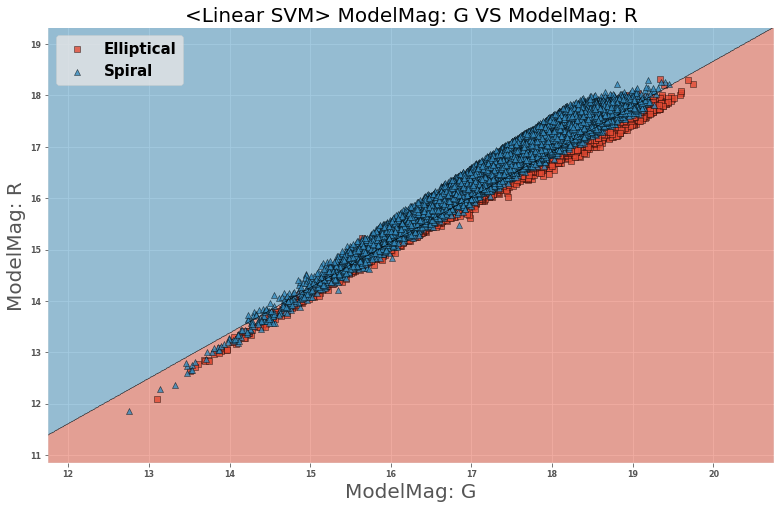

In [50]:
#Visualization
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
plt.style.use('ggplot') 

X_3_combined = np.vstack((X_3_train, X_3_test))
y_3_combined = np.hstack((y_3_train, y_3_test))

fig = plt.figure(figsize=(13,8))
plot_decision_regions(X_3_combined, y_3_combined, clf=svm_clf_3, colors='C0,C1,C2',  res=0.02)
plt.title("<Linear SVM> ModelMag: G VS ModelMag: R", fontsize=20)
plt.xlabel("ModelMag: G", fontsize=20)
plt.ylabel("ModelMag: R", fontsize=20)
L = plt.legend(fontsize=15)
L.get_texts()[0].set_text('Elliptical')
L.get_texts()[1].set_text('Spiral')
plt.xlim()
plt.ylim()
plt.savefig('images/Linear SVM ModelMag_G VS ModelMag_R.png', dpi=300)
plt.show()

# Polynomial Kernel

In [51]:
from sklearn.svm import SVC
poly_kernel_svm_clf_3 = Pipeline([
    ("scaler",  StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
])
poly_kernel_svm_clf_3.fit(X_3_train, y_3_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=5, cache_size=200, class_weight=None, coef0=1,
                     decision_function_shape='ovr', degree=3,
                     gamma='auto_deprecated', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [52]:
from sklearn.metrics import classification_report, confusion_matrix
y_3_pred_poly = poly_kernel_svm_clf_3.predict(X_3_test)
print(confusion_matrix(y_3_test, y_3_pred_poly))
print(classification_report(y_3_test, y_3_pred_poly))

[[1019  498]
 [ 265 4477]]
              precision    recall  f1-score   support

           0       0.79      0.67      0.73      1517
           1       0.90      0.94      0.92      4742

    accuracy                           0.88      6259
   macro avg       0.85      0.81      0.82      6259
weighted avg       0.87      0.88      0.87      6259



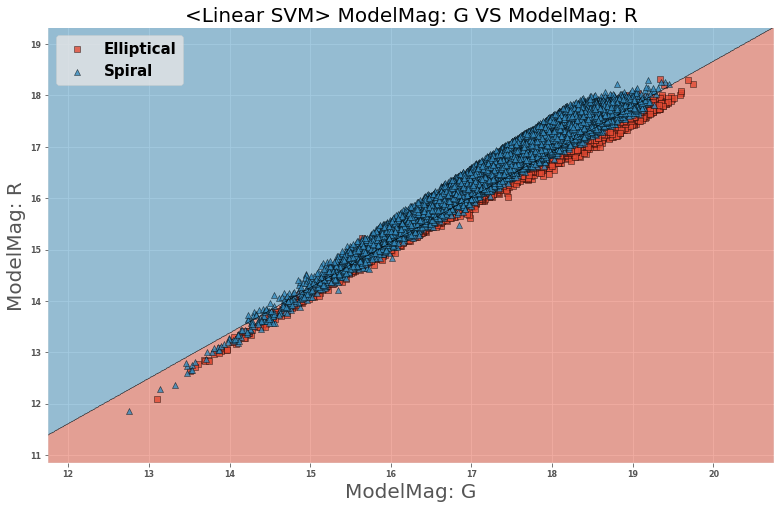

In [53]:
#Visualization
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
plt.style.use('ggplot') 

X_3_combined = np.vstack((X_3_train, X_3_test))
y_3_combined = np.hstack((y_3_train, y_3_test))

fig = plt.figure(figsize=(13,8))
plot_decision_regions(X_3_combined, y_3_combined, clf=svm_clf_3, colors='C0,C1,C2',  res=0.02)
plt.title("<Linear SVM> ModelMag: G VS ModelMag: R", fontsize=20)
plt.xlabel("ModelMag: G", fontsize=20)
plt.ylabel("ModelMag: R", fontsize=20)
L = plt.legend(fontsize=15)
L.get_texts()[0].set_text('Elliptical')
L.get_texts()[1].set_text('Spiral')
plt.xlim()
plt.ylim()
plt.savefig('images/Linear SVM ModelMag_G VS ModelMag_R.png', dpi=300)
plt.show()

# RBF Kernel

In [54]:
rbf_kernel_svm_clf_3 = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=0.1, C=1))
])

#Train model with fit function
rbf_kernel_svm_clf_3.fit(X_3_train, y_3_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=0.1,
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [55]:
from sklearn.metrics import classification_report, confusion_matrix
pred_test_rbf_kernel_svm_clf_3 = rbf_kernel_svm_clf_3.predict(X_3_test)
print(confusion_matrix(y_3_test, pred_test_rbf_kernel_svm_clf_3))
print(classification_report(y_3_test, pred_test_rbf_kernel_svm_clf_3))

[[1024  493]
 [ 297 4445]]
              precision    recall  f1-score   support

           0       0.78      0.68      0.72      1517
           1       0.90      0.94      0.92      4742

    accuracy                           0.87      6259
   macro avg       0.84      0.81      0.82      6259
weighted avg       0.87      0.87      0.87      6259



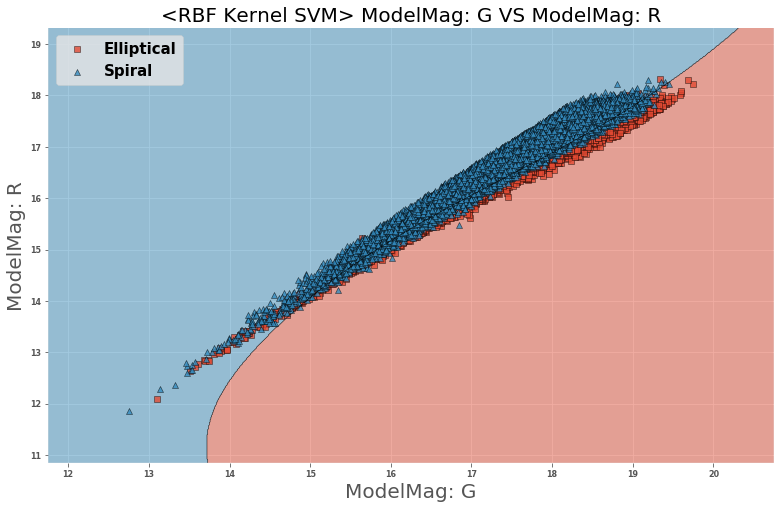

In [57]:
#Visualization
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
plt.style.use('ggplot') 

fig = plt.figure(figsize=(13,8))
plot_decision_regions(X_3_combined, y_3_combined, clf=rbf_kernel_svm_clf_3, colors='C0,C1,C2',  res=0.02)
plt.title("<RBF Kernel SVM> ModelMag: G VS ModelMag: R", fontsize=20)
plt.xlabel("ModelMag: G", fontsize=20)
plt.ylabel("ModelMag: R", fontsize=20)
L = plt.legend(fontsize=15)
L.get_texts()[0].set_text('Elliptical')
L.get_texts()[1].set_text('Spiral')
plt.xlim()
plt.ylim()
plt.savefig('images/RBF Kernel SVM ModelMag_G VS ModelMag_R.png', dpi=300)
plt.show()

# u-g VS g-r

# Linear

In [58]:
import pandas as pd
import numpy as np
from IPython.display import Image
%matplotlib inline

data2 = pd.read_csv("data_sl.csv")
X_4 = data2[["u-g","g-r"]]

#Converting class types into integers 0 for E and 1 for S
data2["class"] = [0 if i == "E" else 1 for i in data2["class"]]
y_4 = data2["class"]

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Separate data into traing (70%) and test data (30%)
X_4_train, X_4_test, y_4_train, y_4_test = train_test_split(X_4, y_4, test_size=0.3, random_state=None)

from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC

#Linear SVM
svm_clf_4 = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge", max_iter=10000)),
])

#Train model with fit function
svm_clf_4.fit(X_4_train, y_4_train)

/Users/kanta/anaconda3/envs/ml/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=1, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=10000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [59]:
from sklearn.metrics import classification_report, confusion_matrix
y_4_pred_linear = svm_clf_4.predict(X_4_test)

print(confusion_matrix(y_4_test, y_4_pred_linear))
print(classification_report(y_4_test, y_4_pred_linear))

[[ 745  812]
 [ 259 4443]]
              precision    recall  f1-score   support

           0       0.74      0.48      0.58      1557
           1       0.85      0.94      0.89      4702

    accuracy                           0.83      6259
   macro avg       0.79      0.71      0.74      6259
weighted avg       0.82      0.83      0.82      6259



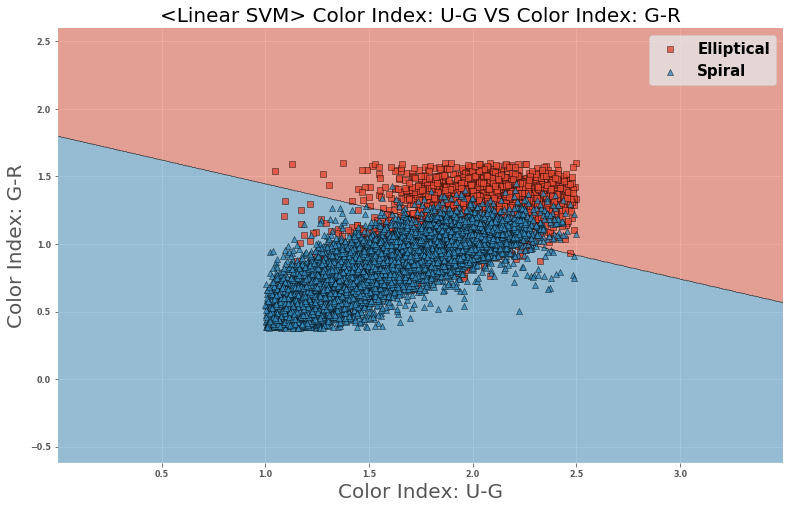

In [60]:
#Visualization
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
plt.style.use('ggplot') 

X_4_combined = np.vstack((X_4_train, X_4_test))
y_4_combined = np.hstack((y_4_train, y_4_test))

fig = plt.figure(figsize=(13,8))
plot_decision_regions(X_4_combined, y_4_combined, clf=svm_clf_4, colors='C0,C1,C2',  res=0.02)
plt.title("<Linear SVM> Color Index: U-G VS Color Index: G-R", fontsize=20)
plt.xlabel("Color Index: U-G", fontsize=20)
plt.ylabel("Color Index: G-R", fontsize=20)
plt.xlim()
plt.ylim()
L = plt.legend(fontsize=15)
L.get_texts()[0].set_text('Elliptical')
L.get_texts()[1].set_text('Spiral')
plt.savefig('images/Linear SVM U-G VS G-R.png', dpi=300)
plt.show()

# Polynomial Kernel

In [61]:
from sklearn.svm import SVC
poly_kernel_svm_clf_4 = Pipeline([
    ("scaler",  StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
])
poly_kernel_svm_clf_4.fit(X_4_train, y_4_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=5, cache_size=200, class_weight=None, coef0=1,
                     decision_function_shape='ovr', degree=3,
                     gamma='auto_deprecated', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [62]:
from sklearn.metrics import classification_report, confusion_matrix
y_4_pred_poly = poly_kernel_svm_clf_4.predict(X_4_test)
print(confusion_matrix(y_4_test, y_4_pred_poly))
print(classification_report(y_4_test, y_4_pred_poly))

[[ 597  960]
 [ 113 4589]]
              precision    recall  f1-score   support

           0       0.84      0.38      0.53      1557
           1       0.83      0.98      0.90      4702

    accuracy                           0.83      6259
   macro avg       0.83      0.68      0.71      6259
weighted avg       0.83      0.83      0.80      6259



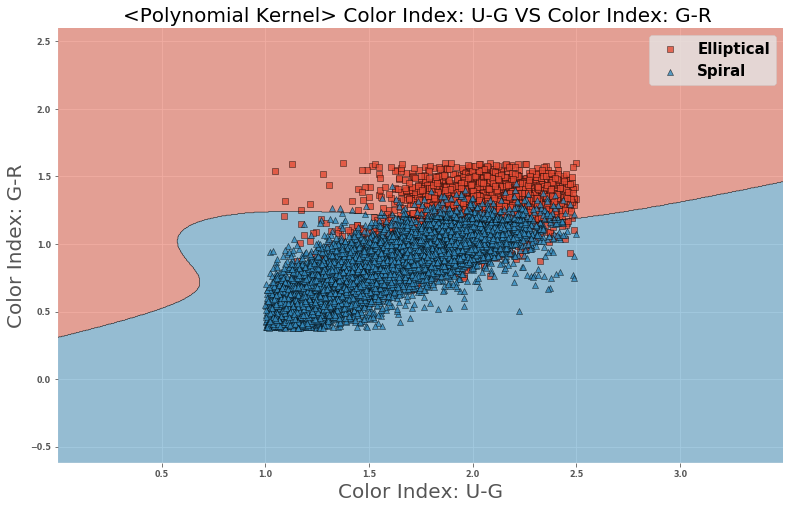

In [63]:
#Visualization
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
plt.style.use('ggplot') 

fig = plt.figure(figsize=(13,8))
plot_decision_regions(X_4_combined, y_4_combined, clf=poly_kernel_svm_clf_4, colors='C0,C1,C2',  res=0.02)
plt.title("<Polynomial Kernel> Color Index: U-G VS Color Index: G-R ", fontsize=20)
plt.xlabel("Color Index: U-G", fontsize=20)
plt.ylabel("Color Index: G-R", fontsize=20)
plt.xlim()
plt.ylim()
L = plt.legend(fontsize=15)
L.get_texts()[0].set_text('Elliptical')
L.get_texts()[1].set_text('Spiral')
plt.savefig('images/Polynomial Kernel U-G VS G-R.png', dpi=300)
plt.show()

# RBF Kernel

In [64]:
rbf_kernel_svm_clf_4 = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=0.1, C=1))
])

#Train model with fit function
rbf_kernel_svm_clf_4.fit(X_4_train, y_4_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=0.1,
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [65]:
from sklearn.metrics import classification_report, confusion_matrix
pred_test_rbf_kernel_svm_clf_4 = rbf_kernel_svm_clf_4.predict(X_4_test)
print(confusion_matrix(y_4_test, pred_test_rbf_kernel_svm_clf_4))
print(classification_report(y_4_test, pred_test_rbf_kernel_svm_clf_4))

[[ 611  946]
 [ 130 4572]]
              precision    recall  f1-score   support

           0       0.82      0.39      0.53      1557
           1       0.83      0.97      0.89      4702

    accuracy                           0.83      6259
   macro avg       0.83      0.68      0.71      6259
weighted avg       0.83      0.83      0.80      6259



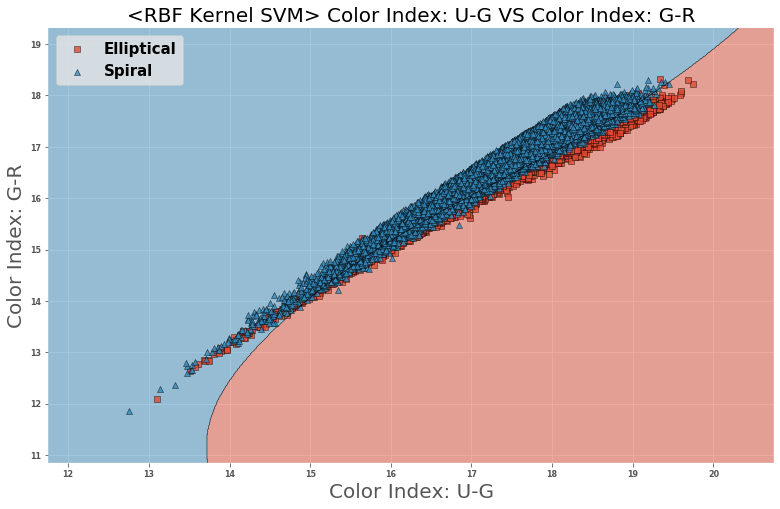

In [66]:
#Visualization
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
plt.style.use('ggplot') 

fig = plt.figure(figsize=(13,8))
plot_decision_regions(X_3_combined, y_3_combined, clf=rbf_kernel_svm_clf_3, colors='C0,C1,C2',  res=0.02)
plt.title("<RBF Kernel SVM> Color Index: U-G VS Color Index: G-R",fontsize=20)
plt.xlabel("Color Index: U-G", fontsize=20)
plt.ylabel("Color Index: G-R", fontsize=20)
L = plt.legend(fontsize=15)
L.get_texts()[0].set_text('Elliptical')
L.get_texts()[1].set_text('Spiral')
plt.xlim()
plt.ylim()
plt.savefig('images/RBF Kernel SVM Color Index: U-G VS Color Index: G-R.png', dpi=300)
plt.show()

# SVM with scikit_learn: : G-R VS Concentration of G

# Linear SVM

In [67]:
import pandas as pd
import numpy as np
from IPython.display import Image
%matplotlib inline

data2 = pd.read_csv("data_sl.csv")
X_5 = data2[["g-r","concentration_g"]]

#Converting class types into integers 0 for E and 1 for S
data2["class"] = [0 if i == "E" else 1 for i in data2["class"]]
y_5 = data2["class"]

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Separate data into traing (70%) and test data (30%)
X_5_train, X_5_test, y_5_train, y_5_test = train_test_split(X_5, y_5, test_size=0.3, random_state=None)

from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC

#Linear SVM
svm_clf_5 = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge", max_iter=100000)),
])

#Train model with fit function
svm_clf_5.fit(X_5_train, y_5_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=1, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=100000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [68]:
from sklearn.metrics import classification_report, confusion_matrix
y_5_pred_linear = svm_clf_5.predict(X_5_test)

print(confusion_matrix(y_5_test, y_5_pred_linear))
print(classification_report(y_5_test, y_5_pred_linear))

[[1171  331]
 [ 411 4346]]
              precision    recall  f1-score   support

           0       0.74      0.78      0.76      1502
           1       0.93      0.91      0.92      4757

    accuracy                           0.88      6259
   macro avg       0.83      0.85      0.84      6259
weighted avg       0.88      0.88      0.88      6259



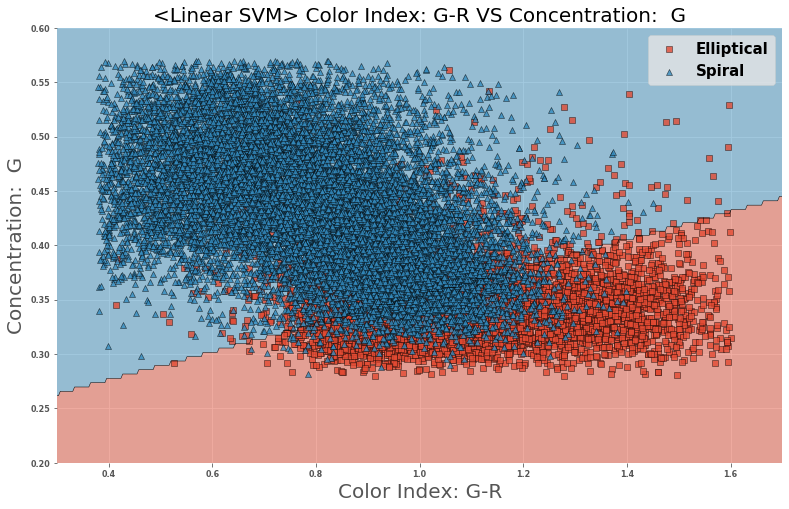

In [70]:
#Visualization
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
plt.style.use('ggplot') 

X_5_combined = np.vstack((X_5_train, X_5_test))
y_5_combined = np.hstack((y_5_train, y_5_test))

fig = plt.figure(figsize=(13,8))
plot_decision_regions(X_5_combined, y_5_combined, clf=svm_clf_5, colors='C0,C1,C2',  res=0.02)
plt.title("<Linear SVM> Color Index: G-R VS Concentration:  G", fontsize=20)
plt.xlabel("Color Index: G-R", fontsize=20)
plt.ylabel("Concentration:  G", fontsize=20)
plt.xlim(0.3, 1.7)
plt.ylim(0.2, 0.6)
L = plt.legend(fontsize=15)
L.get_texts()[0].set_text('Elliptical')
L.get_texts()[1].set_text('Spiral')
plt.savefig('images/Linear SVM G-R VS Con_G.png', dpi=300)
plt.show()

# Polynomial Kernel

In [71]:
from sklearn.svm import SVC
poly_kernel_svm_clf_5 = Pipeline([
    ("scaler",  StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
])
poly_kernel_svm_clf_5.fit(X_5_train, y_5_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=5, cache_size=200, class_weight=None, coef0=1,
                     decision_function_shape='ovr', degree=3,
                     gamma='auto_deprecated', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [72]:
from sklearn.metrics import classification_report, confusion_matrix
y_5_pred_poly = poly_kernel_svm_clf_5.predict(X_5_test)
print(confusion_matrix(y_5_test, y_5_pred_poly))
print(classification_report(y_5_test, y_5_pred_poly))

[[1099  403]
 [ 250 4507]]
              precision    recall  f1-score   support

           0       0.81      0.73      0.77      1502
           1       0.92      0.95      0.93      4757

    accuracy                           0.90      6259
   macro avg       0.87      0.84      0.85      6259
weighted avg       0.89      0.90      0.89      6259



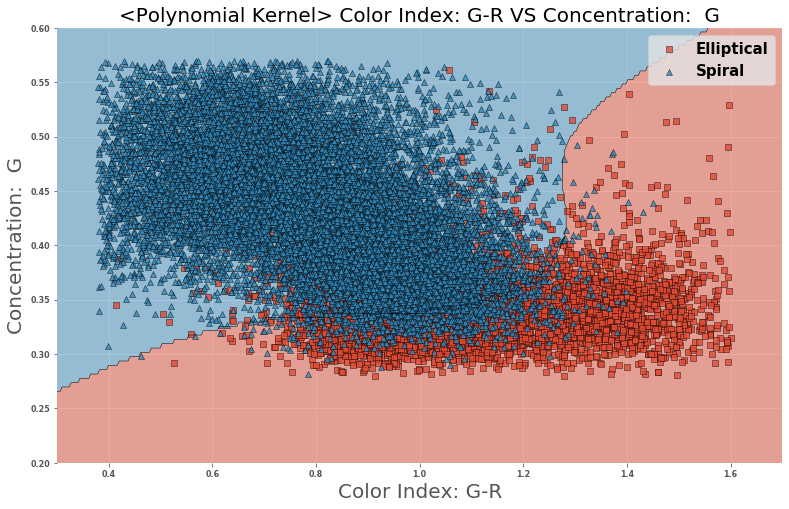

In [73]:
#Visualization
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
plt.style.use('ggplot') 

fig = plt.figure(figsize=(13,8))
plot_decision_regions(X_5_combined, y_5_combined, clf=poly_kernel_svm_clf_5, colors='C0,C1,C2',  res=0.02)
plt.title("<Polynomial Kernel> Color Index: G-R VS Concentration:  G", fontsize=20)
plt.xlabel("Color Index: G-R", fontsize=20)
plt.ylabel("Concentration:  G", fontsize=20)
plt.xlim(0.3, 1.7)
plt.ylim(0.2, 0.6)
L = plt.legend(fontsize=15)
L.get_texts()[0].set_text('Elliptical')
L.get_texts()[1].set_text('Spiral')
plt.savefig('images/Polynomial Kernel G-R VS Con_G.png', dpi=300)
plt.show()

# RBF Kernel

In [74]:
rbf_kernel_svm_clf_5 = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=0.1, C=1))
])

#Train model with fit function
rbf_kernel_svm_clf_5.fit(X_5_train, y_5_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=0.1,
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [75]:
from sklearn.metrics import classification_report, confusion_matrix
pred_test_rbf_kernel_svm_clf_5 = rbf_kernel_svm_clf_5.predict(X_5_test)
print(confusion_matrix(y_5_test, pred_test_rbf_kernel_svm_clf_5))
print(classification_report(y_5_test, pred_test_rbf_kernel_svm_clf_5))

[[1133  369]
 [ 297 4460]]
              precision    recall  f1-score   support

           0       0.79      0.75      0.77      1502
           1       0.92      0.94      0.93      4757

    accuracy                           0.89      6259
   macro avg       0.86      0.85      0.85      6259
weighted avg       0.89      0.89      0.89      6259



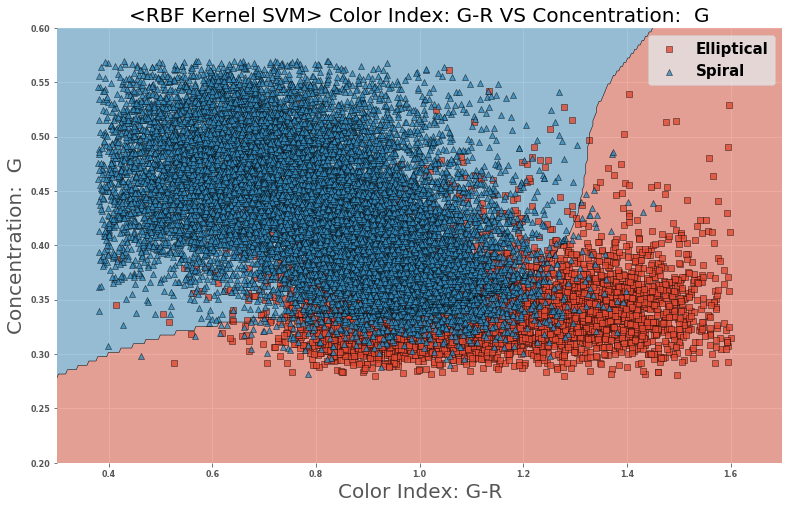

In [83]:
#Visualization
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
plt.style.use('ggplot') 

fig = plt.figure(figsize=(13,8))
plot_decision_regions(X_5_combined, y_5_combined, clf=rbf_kernel_svm_clf_5, colors='C0,C1,C2',  res=0.02)
plt.title("<RBF Kernel SVM> Color Index: G-R VS Concentration:  G", fontsize=20)
plt.xlabel("Color Index: G-R", fontsize=20)
plt.ylabel("Concentration:  G", fontsize=20)
L = plt.legend(fontsize=15)
L.get_texts()[0].set_text('Elliptical')
L.get_texts()[1].set_text('Spiral')
plt.xlim(0.3, 1.7)
plt.ylim(0.2, 0.6)
plt.savefig('images/RBF Kernel SVM G-R VS Con_G.png', dpi=300)
plt.show()

# G-R VS Concentration_G VS Concnentration_R

In [77]:
import pandas as pd
import numpy as np
from IPython.display import Image
%matplotlib inline

data2 = pd.read_csv("data_sl.csv")
X_6 = data2[["g-r","concentration_g", "concentration_r"]]

#Converting class types into integers 0 for E and 1 for S
data2["class"] = [0 if i == "E" else 1 for i in data2["class"]]
y_6 = data2["class"]

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Separate data into traing (70%) and test data (30%)
X_6_train, X_6_test, y_6_train, y_6_test = train_test_split(X_6, y_6, test_size=0.3, random_state=None)

# Linear SVM

In [78]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC

#Linear SVM
svm_clf_6 = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge", max_iter=100000)),
])

#Train model with fit function
svm_clf_6.fit(X_6_train, y_6_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=1, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=100000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [79]:
from sklearn.metrics import classification_report, confusion_matrix
y_6_pred_linear = svm_clf_6.predict(X_6_test)

print(confusion_matrix(y_6_test, y_6_pred_linear))
print(classification_report(y_6_test, y_6_pred_linear))

[[1204  333]
 [ 353 4369]]
              precision    recall  f1-score   support

           0       0.77      0.78      0.78      1537
           1       0.93      0.93      0.93      4722

    accuracy                           0.89      6259
   macro avg       0.85      0.85      0.85      6259
weighted avg       0.89      0.89      0.89      6259



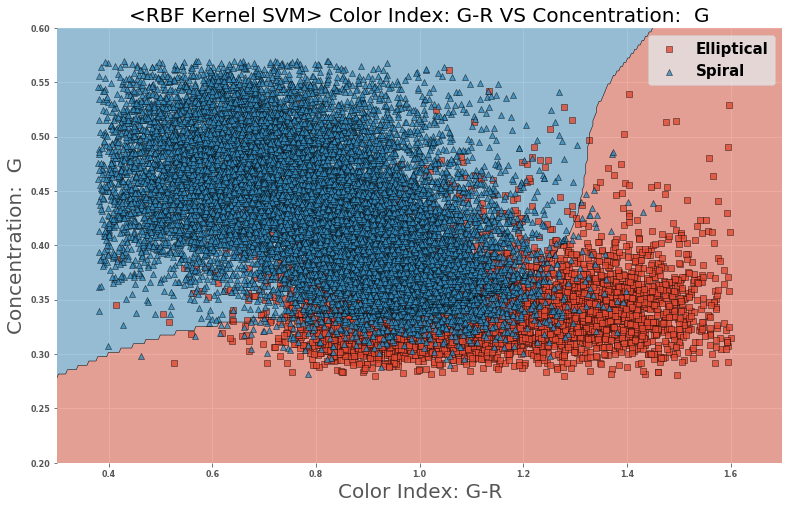

In [80]:
#Visualization
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
plt.style.use('ggplot') 

fig = plt.figure(figsize=(13,8))
plot_decision_regions(X_5_combined, y_5_combined, clf=rbf_kernel_svm_clf_5, colors='C0,C1,C2',  res=0.02)
plt.title("<RBF Kernel SVM> Color Index: G-R VS Concentration:  G", fontsize=20)
plt.xlabel("Color Index: G-R", fontsize=20)
plt.ylabel("Concentration:  G", fontsize=20)
L = plt.legend(fontsize=15)
L.get_texts()[0].set_text('Elliptical')
L.get_texts()[1].set_text('Spiral')
plt.xlim(0.3, 1.7)
plt.ylim(0.2, 0.6)
plt.savefig('images/RBF Kernel SVM G-R VS Con_G.png', dpi=300)
plt.show()

# Polynomial SVM

In [81]:
from sklearn.svm import SVC
poly_kernel_svm_clf_6 = Pipeline([
    ("scaler",  StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
])
poly_kernel_svm_clf_6.fit(X_6_train, y_6_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=5, cache_size=200, class_weight=None, coef0=1,
                     decision_function_shape='ovr', degree=3,
                     gamma='auto_deprecated', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [82]:
from sklearn.metrics import classification_report, confusion_matrix
y_6_pred_poly = poly_kernel_svm_clf_6.predict(X_6_test)
print(confusion_matrix(y_6_test, y_6_pred_poly))
print(classification_report(y_6_test, y_6_pred_poly))

[[1123  414]
 [ 214 4508]]
              precision    recall  f1-score   support

           0       0.84      0.73      0.78      1537
           1       0.92      0.95      0.93      4722

    accuracy                           0.90      6259
   macro avg       0.88      0.84      0.86      6259
weighted avg       0.90      0.90      0.90      6259



# RBF Kernel

In [43]:
rbf_kernel_svm_clf_6 = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=0.1, C=1))
])

#Train model with fit function
rbf_kernel_svm_clf_6.fit(X_6_train, y_6_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=0.1,
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [44]:
from sklearn.metrics import classification_report, confusion_matrix
pred_test_rbf_kernel_svm_clf_6 = rbf_kernel_svm_clf_6.predict(X_6_test)
print(confusion_matrix(y_6_test, pred_test_rbf_kernel_svm_clf_6))
print(classification_report(y_6_test, pred_test_rbf_kernel_svm_clf_6))

[[1136  397]
 [ 257 4469]]
              precision    recall  f1-score   support

           0       0.82      0.74      0.78      1533
           1       0.92      0.95      0.93      4726

    accuracy                           0.90      6259
   macro avg       0.87      0.84      0.85      6259
weighted avg       0.89      0.90      0.89      6259

